In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("/home/amitsharma123/Downloads/COVID-19 Clinical Data Repository.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date_published                 922 non-null    datetime64[ns]
 1   clinic_state                   922 non-null    object        
 2   test_name                      922 non-null    object        
 3   swab_type                      922 non-null    object        
 4   covid19_test_results           922 non-null    object        
 5   age                            922 non-null    int64         
 6   high_risk_exposure_occupation  706 non-null    float64       
 7   high_risk_interactions         289 non-null    float64       
 8   diabetes                       922 non-null    bool          
 9   chd                            922 non-null    bool          
 10  htn                            922 non-null    bool          
 11  cancer             

In [2]:
data['dia'].fillna((data['dia'].mean()), inplace = True)
bins= [60,70,80,90]
labels = ['Low Dia','Normal Dia',
          'High Dia']
dia = pd.cut(data['dia'], bins=bins, labels=labels, right=False)
data["DIA"]=dia
df=data.drop(['dia'],axis=1)
df=pd.concat([df,pd.get_dummies(df['DIA'],drop_first=True)],axis=1)
df = df.drop (['DIA'],axis=1)
df.head(3)
dia_data = pd.DataFrame({
    "Normal Dia":df['Normal Dia'],
    "High Dia":df['High Dia']
    })
#dia_data

In [3]:
cough = pd.get_dummies(data['cough_severity'], drop_first=True)
cough_data = pd.DataFrame({"Moderate":cough['Moderate'],"Severe":cough['Severe']})
cough_data['Moderate'].fillna((cough_data['Moderate'].mean()), inplace = True)
cough_data['Severe'].fillna((cough_data['Severe'].mean()), inplace = True)
#cough_data #to be concated

In [4]:
htn = pd.get_dummies('htn')
data['htn'] = htn
data['htn'].fillna((data['htn'].mean()), inplace = True)

chd= pd.get_dummies('chd')
data['chd'] = chd
data['chd'].fillna((data['chd'].mean()), inplace = True)
chd_htn = data['htn'] + data['chd']
#chd_htn

In [5]:
bins= [5,10,20,30,40,50,60,70,80,90,100]
labels = ['age1','age2','age3','age4','age5','age6','age7','age8','age9','age10']
Age = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data["Age"]=Age
df=data.drop(['age'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Age'],drop_first=True)],axis=1)
df = df.drop (['Age'],axis=1)
df.head()

age_data = pd.DataFrame({
 #   "Age1":df['age1'],
    "Age2":df['age2'],
    "Age3":df['age3'],
    "Age4":df['age4'],
    "Age5":df['age5'],
    "Age6":df['age6'],
    "Age7":df['age7'],
    "Age8":df['age8'],
    "Age9":df['age9'],
    "Age10":df['age10']

})
#age_data

In [6]:
bins= [80,100,120,130]
labels = ['lower_sys','Normal_sys','High_sys']
sys = pd.cut(data['sys'], bins=bins, labels=labels, right=False)
data["SYS"]=sys
df=data.drop(['sys'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SYS'],drop_first=True)],axis=1)
df = df.drop (['SYS'],axis=1)
df.head()
sys_data = pd.DataFrame({"High_sys":df['High_sys'],"Normal_sys":df['Normal_sys']})
#sys_data

In [7]:
bins= [30,40,50,60,70,80,90,100,120,130]
labels = ['sys1','sys2','sys3','sys4','sys5','sys6','sys7','sys8','sys9']
sys = pd.cut(data['sys'], bins=bins, labels=labels, right=False)
data["SYS"]=sys
df=data.drop(['sys'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SYS'],drop_first=True)],axis=1)
df = df.drop (['SYS'],axis=1)
#df.head()


In [8]:
data['temperature'].fillna((data['temperature'].mean()), inplace = True)
bins= [95,96,98.6,102,110]
labels = ['low_fever', 'normal','fever','high fever']
Temp = pd.cut(data['temperature'], bins=bins, labels=labels, right=False)
data["Temp"]=Temp
df=data.drop(['temperature'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Temp'],drop_first=True)],axis=1)
df = df.drop (['Temp'],axis=1)
df['fever']
fever_data = pd.DataFrame({
                         #"fever":df['fever'],
                        "Normal_fever":df['normal'],
                        "High_fever":df['high fever']})
#fever_data


In [9]:
data['rr'].fillna((data['rr'].mean()), inplace = True)
bins= [5,10,12,20,21]
labels = ['extreme_low_rr','normal RR','RR','high RR']
Temp = pd.cut(data['rr'], bins=bins, labels=labels, right=False)
data["RR"]=Temp
df=data.drop(['rr'],axis=1)
df=pd.concat([df,pd.get_dummies(df['RR'],drop_first=True)],axis=1)
df = df.drop (['RR'],axis=1)
df
rr_data = pd.DataFrame({
                         #"fever":df['fever'],
                        "Normal_RR":df['normal RR'],
                        "High_RR":df['high RR']})
#rr_data

In [10]:
#data['stats'].fillna((data['stats'].mean()), inplace = True)
bins= [93,94,95,96,97,98,99,100]
labels = ['SATS_1','SATS_2','SATS_3','SATS_4','SATS_5','SATS_6', 'SATS_7']
Temp = pd.cut(data['sats'], bins=bins, labels=labels, right=False)
data["SATS"]=Temp
df=data.drop(['sats'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SATS'],drop_first=True)],axis=1)
df = df.drop (['SATS'],axis=1)
df
sats_data = pd.DataFrame({
    "sats_1":df['SATS_2'],
    "sats2":df['SATS_3'],
    "sats4":df['SATS_4'],
   "sats5":df['SATS_5'],
    "sats6":df['SATS_6'],
   "sats7":df['SATS_7'],


})
#sats_data

In [11]:
data['pulse'].fillna((data['pulse'].mean()), inplace = True)
bins= [50,60,70,80,90,100,130,140]
labels = ['low pulse','normal_pulse1',
          'normal_pulse2',
          'normal_pulse3',
          'normal_pulse4',
          'normal_pulse5',
          'high pulse']
pulse = pd.cut(data['pulse'], bins=bins, labels=labels, right=False)
data["Pulse"]=pulse
df=data.drop(['pulse'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Pulse'],drop_first=True)],axis=1)
df = df.drop (['Pulse'],axis=1)
df.head(3)
pulse_data = pd.DataFrame({
    "normal_pulse1":df['normal_pulse1'],
    "normal_pulse2":df['normal_pulse2'],
    "normal_pulse3":df['normal_pulse3'],
    "normal_pulse4":df['normal_pulse4'],
   "normal_pulse5":df['normal_pulse5'],
   "high_pulse":df['high pulse']

})
#pulse_data

In [12]:

data['high_risk_exposure_occupation'].fillna((data['high_risk_exposure_occupation'].mean()), inplace = True)
data['high_risk_interactions'].fillna((data['high_risk_interactions'].mean()), inplace = True)
data['pulse'].fillna((data['pulse'].mean()), inplace = True)
data['sys'].fillna((data['sys'].mean()), inplace = True)
data['dia'].fillna((data['dia'].mean()), inplace = True)
data['rr'].fillna((data['rr'].mean()), inplace = True)
data['sats'].fillna((data['sats'].mean()), inplace = True)
#-----------------------------------------------------------------------
# rapid_flu = pd.get_dummies('rapid_flu_results')
# data['rapid_flu_results'] = rapid_flu
# data['rapid_flu_results'].fillna((data['rapid_flu_results'].mean()), inplace = True)
# #-------------------------------------------------------------------
# rapid_strep = pd.get_dummies('rapid_strep_results')
# data['rapid_strep_results'] = rapid_strep
# data['rapid_strep_results'].fillna((data['rapid_strep_results'].mean()), inplace = True)
#----------------------------------------------------------------------
data['days_since_symptom_onset'].fillna((data['days_since_symptom_onset'].mean()), inplace = True)
data['ctab'].fillna((data['ctab'].mean()), inplace = True)
data['labored_respiration'].fillna((data['labored_respiration'].mean()), inplace = True)
data['rhonchi'].fillna((data['rhonchi'].mean()), inplace = True)
data['wheezes'].fillna((data['wheezes'].mean()), inplace = True)
data['cough'].fillna((data['cough'].mean()), inplace = True)
#------------------------------------------------------------------
# htn = pd.get_dummies('htn')
# data['htn'] = htn
data['htn'].fillna((data['htn'].mean()), inplace = True)

# chd= pd.get_dummies('chd')
# data['chd'] = chd
data['chd'].fillna((data['chd'].mean()), inplace = True)

# cough = pd.get_dummies('cough_severity')
# data['cough_severity'] = cough
#data['cough_severity'].fillna((data['cough_severity'].mean()), inplace = True)

#-------------------------------------------------------------------
# data['fever'].fillna((data['fever'].mean()), inplace = True)
data['sob'].fillna((data['sob'].mean()), inplace = True)
#---------------------------------------------------------------


# data['sob_severity'].fillna((data['sob_severity'].mean()), inplace = True)

data['diarrhea'].fillna((data['diarrhea'].mean()), inplace = True)
data['fatigue'].fillna((data['fatigue'].mean()), inplace = True)
data['headache'].fillna((data['headache'].mean()), inplace = True)
data['loss_of_smell'].fillna((data['loss_of_smell'].mean()), inplace = True)
data['loss_of_taste'].fillna((data['loss_of_taste'].mean()), inplace = True)
data['runny_nose'].fillna((data['runny_nose'].mean()), inplace = True)
data['muscle_sore'].fillna((data['muscle_sore'].mean()), inplace = True)
data['sore_throat'].fillna((data['sore_throat'].mean()), inplace = True)
# #-----------------------------------------------------------------
# #cxr_find = pd.get_dummies('cxr_findings')
# #data['cxr_findings'] = cxr_find
#data['cxr_findings'].fillna((data['cxr_findings'].mean()), inplace = True)
# #-----------------------------------------------------------------
# # cxr_imp = pd.get_dummies('cxr_impression')
# # data['cxr_impression'] = cxr_imp
#data['cxr_impression'].fillna((data['cxr_impression'].mean()), inplace = True)
# #------------------------------------------------------------------
# # cxr_link = pd.get_dummies('cxr_link')
# # data['cxr_link'] = cxr_link
#data['cxr_link'].fillna((data['cxr_link'].mean()), inplace = True)
#data['er_referral'].fillna((data['er_referral'].mean()), inplace = True)


In [13]:
high_risk_exposure_occupation = pd.get_dummies(data['high_risk_exposure_occupation'], drop_first=True)
high_risk_interactions = pd.get_dummies(data['high_risk_interactions'], drop_first=True)
cxr_link = pd.get_dummies('cxr_link')
cxr_impression = pd.get_dummies(data['cxr_impression'])
cxr_finding = pd.get_dummies(data['cxr_findings'])
ctab = pd.get_dummies(data['ctab'], drop_first=True)
laboured_respiration = pd.get_dummies(data['labored_respiration'], drop_first=True)
ronchi = pd.get_dummies(data['rhonchi'], drop_first=True)
weezes = pd.get_dummies(data['wheezes'], drop_first=True)
fatigue = pd.get_dummies(data['fatigue'], drop_first=True)
headache = pd.get_dummies(data['headache'], drop_first=True)
runny_nose = pd.get_dummies(data['runny_nose'], drop_first=True)
muscle_sore = pd.get_dummies(data['muscle_sore'], drop_first=True)
diariah = pd.get_dummies(data['diarrhea'], drop_first=True)
sore_throat = pd.get_dummies(data['sore_throat'], drop_first=True)
sob = pd.get_dummies(data['sob'], drop_first=True)
clinic_state = pd.get_dummies(data['clinic_state'])
dia = pd.get_dummies(data['dia'])
sar_co2 = pd.get_dummies(data['test_name'], drop_first = True)
a1 = sar_co2['SARS COV 2 RNA RTPCR'] + sar_co2['SARS CoV w/CoV 2 RNA'] +sar_co2['SARS-CoV-2, NAA']
diabetes = pd.get_dummies(data['diabetes'], drop_first = True)
chd = pd.get_dummies(data['chd'], drop_first = True)
cancer =pd.get_dummies(data['cancer'], drop_first = True)
asthma = pd.get_dummies(data['asthma'], drop_first = True)
copd = pd.get_dummies(data['copd'], drop_first = True)
autoimmune_dis = pd.get_dummies(data['autoimmune_dis'], drop_first = True)
loss_taste = pd.get_dummies(data['loss_of_taste'], drop_first=True)
loss_smell = pd.get_dummies(data['loss_of_smell'], drop_first=True)

new_data = pd.concat([clinic_state,a1,diabetes,chd,cancer,
                  asthma,copd,autoimmune_dis,diariah,
                 sob,sore_throat,muscle_sore,runny_nose,
                 loss_taste, loss_smell, headache,fatigue,

                       weezes,
                 ronchi, laboured_respiration,
                     ctab,
                      high_risk_interactions, high_risk_exposure_occupation],
                      axis =1)

new_data

,CA,0,True,True,True,True,True,0.22727272727272727,1.0,0.43103448275862066,...,0.026615969581749048,1.0,0.006818181818181818,1.0,0.9243498817966903,1.0,0.5501730103806228,1.0,0.4376770538243626,1.0
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
3,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
918,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
919,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
920,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
new_data.columns = ['clinic_state','Sars_co2','diabetes','chd','cancer',
                 'asthma','copd','autoimmune_dis','diariah_0.227273',
               'diariah_1.000000', 'sob', 'sore_throat_0.820896',
               'sore_throat_0.1', 'muscle_sore_0.68','muscle_sore_1.0',
              'runny_nose_0.5', 'runny_nose_1.0', 'loss_taste_0.26',
               'loss_taste_1.0', 'loss_smell_0.30', 'loss_smell_1.0',
              'headache_0.80', 'headache_1.0', 'fatigue_0.85','fatigue_1.0'
               , 'weezes_0.0525', 'weezes_1.0',
                    'ronchi_0.026616',
               'ronchi_1.0', 'laboured_respiration_0.006818', 'laboured_respiration_1.0',
               'ctab_0.924', 'ctab_1.0',
               'high_risk_interactions_0.550173',
                'high_risk_interactions_1.0', 'high_risk_exposure_occupation_0.437677',
                'high_risk_exposure_occupation_1.0'
                   ]
new_data

,clinic_state,Sars_co2,diabetes,chd,cancer,asthma,copd,autoimmune_dis,diariah_0.227273,diariah_1.000000,...,ronchi_0.026616,ronchi_1.0,laboured_respiration_0.006818,laboured_respiration_1.0,ctab_0.924,ctab_1.0,high_risk_interactions_0.550173,high_risk_interactions_1.0,high_risk_exposure_occupation_0.437677,high_risk_exposure_occupation_1.0
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
3,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
918,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
919,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
920,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [15]:
import numpy as np
x = pd.concat([pulse_data, sats_data, rr_data, fever_data,
               chd_htn, cough_data, dia_data, new_data], axis = 1 )
X = np.array(x)
x.head(5)

,normal_pulse1,normal_pulse2,normal_pulse3,normal_pulse4,normal_pulse5,high_pulse,sats_1,sats2,sats4,sats5,...,ronchi_0.026616,ronchi_1.0,laboured_respiration_0.006818,laboured_respiration_1.0,ctab_0.924,ctab_1.0,high_risk_interactions_0.550173,high_risk_interactions_1.0,high_risk_exposure_occupation_0.437677,high_risk_exposure_occupation_1.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [16]:
x.shape

(922, 58)

In [17]:
pd.DataFrame({'X_features':x.columns})

,X_features
0,normal_pulse1
1,normal_pulse2
2,normal_pulse3
3,normal_pulse4
4,normal_pulse5
5,high_pulse
6,sats_1
7,sats2
8,sats4
9,sats5


In [18]:
covid_19 = pd.get_dummies(data['covid19_test_results'])
y = covid_19
y = y[['Negative', 'Positive']]
y = y['Negative'] + y['Positive']
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=40 ) 

In [20]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
from keras.optimizers import Adam
model.add(Dense(units =10, input_shape = (58,)))
model.add(Dense(units =12, activation = 'relu'))
model.add(Dense(units =15, activation = 'relu'))
model.add(Dense(units =1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

Using TensorFlow backend.


In [21]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
645/645 [==============================] - 0s 770us/step - loss: 0.6274 - accuracy: 0.6295
Epoch 2/50
645/645 [==============================] - 0s 110us/step - loss: 0.2697 - accuracy: 0.9984
Epoch 3/50
645/645 [==============================] - 0s 103us/step - loss: 0.1081 - accuracy: 0.9984
Epoch 4/50
645/645 [==============================] - 0s 91us/step - loss: 0.0424 - accuracy: 0.9984
Epoch 5/50
645/645 [==============================] - 0s 103us/step - loss: 0.0225 - accuracy: 0.9984
Epoch 6/50
645/645 [==============================] - 0s 98us/step - loss: 0.0167 - accuracy: 0.9984
Epoch 7/50
645/645 [==============================] - 0s 102us/step - loss: 0.0146 - accuracy: 0.9984
Epoch 8/50
645/645 [==============================] - 0s 150us/step - loss: 0.0133 - accuracy: 0.9984
Epoch 9/50
645/645 [==============================] - 0s 162us/step - loss: 0.0128 - accuracy: 0.9984
Epoch 10/50
645/645 [==============================] - 0s 149us/step - loss: 0.0124 

In [22]:
loss =pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy
0,0.627409,0.629457
1,0.269672,0.998450
2,0.108082,0.998450
3,0.042358,0.998450
4,0.022491,0.998450


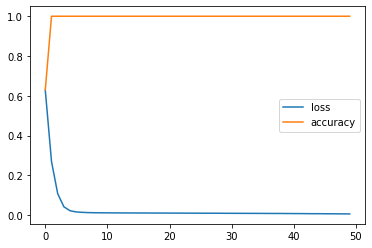

In [23]:
loss.plot()

In [24]:
y_test.shape

(277,)

In [25]:
X = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.]]
y = np.array(X)     #converted y which have 35 feature into array (35,35)
                    # so that model will predict 
y.shape

(58, 58)

In [26]:
type(y)

numpy.ndarray

In [27]:
print("THIS IS JUST AN EXAMPLE :",model.predict(y))

THIS IS JUST AN EXAMPLE : [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [28]:
print("Prediction on X_test data :",model.predict(X_test))

Prediction on X_test data : [[0.99618214]
 [0.9998708 ]
 [0.99951506]
 [0.99903345]
 [0.9995321 ]
 [0.99954057]
 [0.99919885]
 [0.99934083]
 [0.9999491 ]
 [0.9987206 ]
 [0.9997522 ]
 [0.9999856 ]
 [0.99996686]
 [0.9987789 ]
 [0.99901235]
 [0.9987218 ]
 [0.9980387 ]
 [0.99818736]
 [0.99986243]
 [0.99933726]
 [0.99973744]
 [0.99952483]
 [0.99915636]
 [0.9999355 ]
 [0.9992446 ]
 [0.99797326]
 [0.9996183 ]
 [0.99881446]
 [0.9989992 ]
 [0.9860811 ]
 [0.99671245]
 [0.99882966]
 [0.9943743 ]
 [0.998071  ]
 [0.998042  ]
 [0.99974996]
 [0.99763596]
 [0.99988115]
 [0.99846494]
 [0.9996182 ]
 [0.9997986 ]
 [0.99797684]
 [0.99966276]
 [0.99993193]
 [0.9993106 ]
 [0.99757653]
 [0.9998777 ]
 [0.9988673 ]
 [0.99992263]
 [0.99996054]
 [0.99851674]
 [0.9990546 ]
 [0.9999268 ]
 [0.9995869 ]
 [0.99996555]
 [0.9997179 ]
 [0.9999486 ]
 [0.9992217 ]
 [0.99995875]
 [0.99959594]
 [0.9997391 ]
 [0.9999362 ]
 [0.9995322 ]
 [0.99730766]
 [0.9962166 ]
 [0.9991767 ]
 [0.99921477]
 [0.9976878 ]
 [0.98333424]
 [0.99